![tower_bridge](tower_bridge.jpg)

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of `sklearn` and `mlflow`.

You will be working with data stored in `london_weather.csv`, which contains the following columns:
- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

In [68]:
# Run this cell to install mlflow
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable


In [69]:
# Run this cell to import the modules you require
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read in the data
weather = pd.read_csv("london_weather.csv")

# Start coding here
# Use as many cells as you like

In [70]:
weather['date'] = pd.to_datetime(weather["date"], format="%Y%m%d")

In [71]:
weather["year"] = weather["date"].dt.year
weather['month'] = weather['date'].dt.month

In [72]:
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

In [73]:
weather_per_month = weather.groupby(['year', 'month'], as_index = False)[weather_metrics].mean()

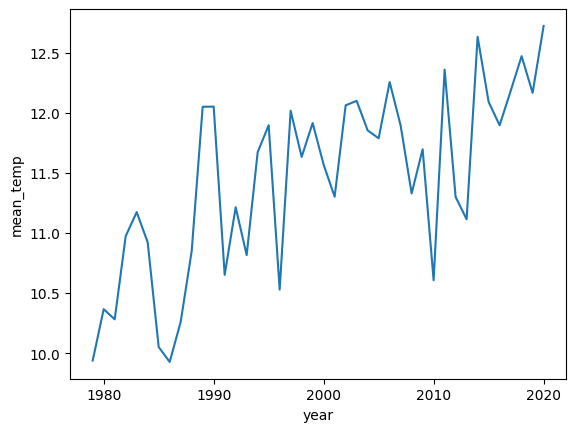

In [74]:
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)
plt.show()

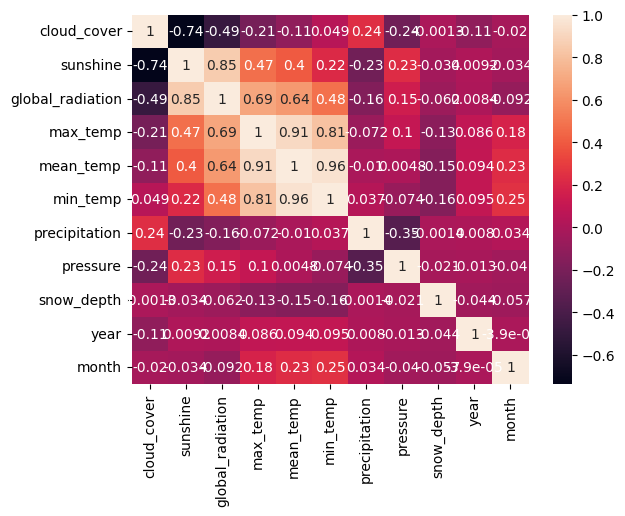

In [75]:
sns.heatmap(weather.corr(), annot=True)
plt.show()

In [76]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979,1
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979,1
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979,1
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979,1
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979,1


In [77]:
weather.shape

(15341, 12)

In [78]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       15322 non-null  float64       
 2   sunshine          15341 non-null  float64       
 3   global_radiation  15322 non-null  float64       
 4   max_temp          15335 non-null  float64       
 5   mean_temp         15305 non-null  float64       
 6   min_temp          15339 non-null  float64       
 7   precipitation     15335 non-null  float64       
 8   pressure          15337 non-null  float64       
 9   snow_depth        13900 non-null  float64       
 10  year              15341 non-null  int64         
 11  month             15341 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 1.4 MB


In [79]:
weather.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,year,month
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000,15341.000000,15341.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986,1999.500359,6.522782
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633,12.121708,3.448856
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000,1979.000000,1.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000,1989.000000,4.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000,2000.000000,7.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000,2010.000000,10.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000,2020.000000,12.000000


In [80]:
df = weather.copy(deep = True)

In [81]:
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
year                   0
month                  0
dtype: int64

In [82]:
missing_values = df.isna()

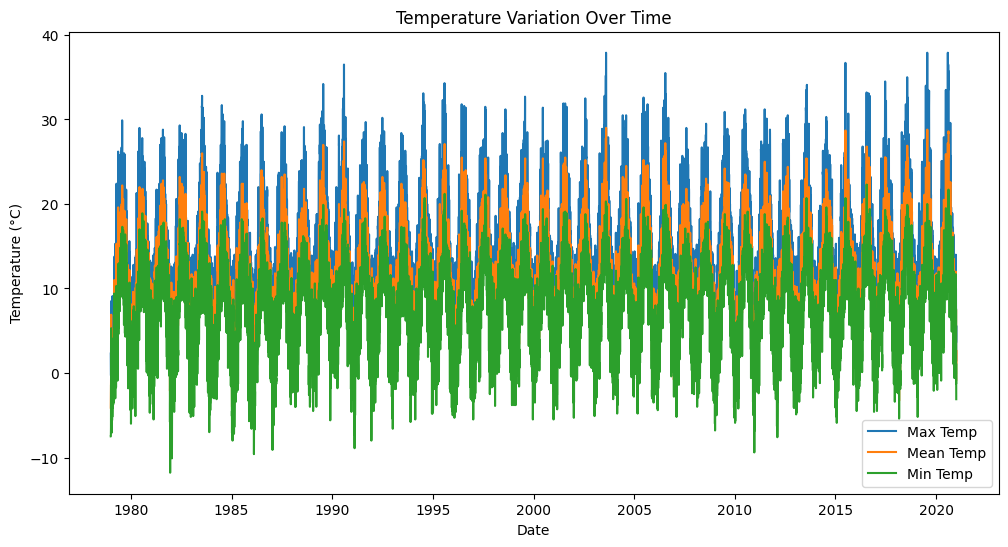

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['max_temp'], label='Max Temp')
plt.plot(df['date'], df['mean_temp'], label='Mean Temp')
plt.plot(df['date'], df['min_temp'], label='Min Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.legend()
plt.show()

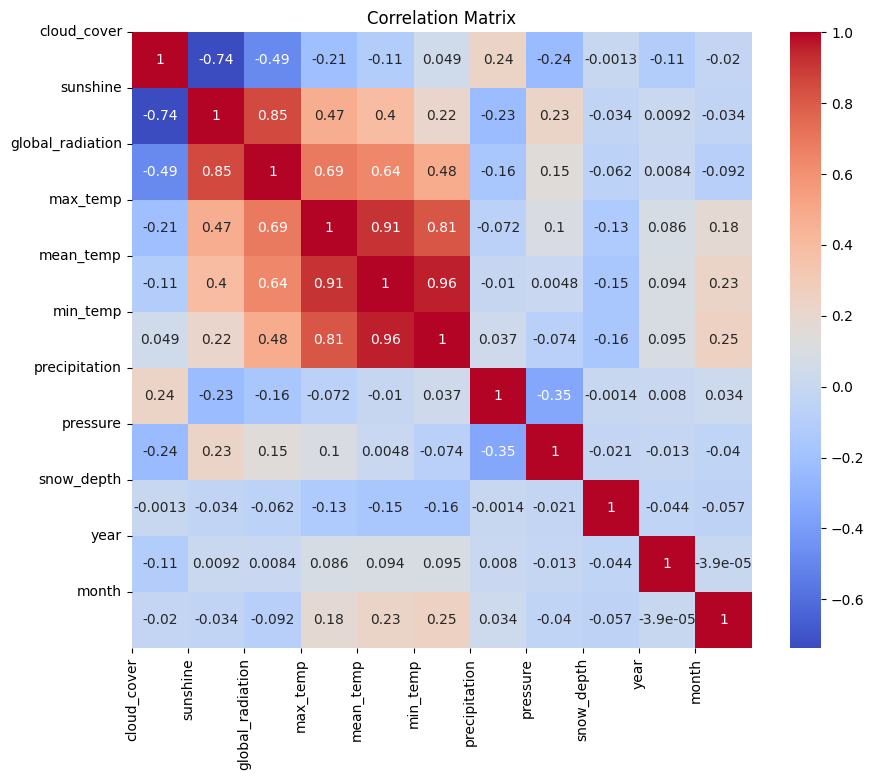

In [84]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

In [85]:
missing_values.mean() * 100

date                0.000000
cloud_cover         0.123851
sunshine            0.000000
global_radiation    0.123851
max_temp            0.039111
mean_temp           0.234665
min_temp            0.013037
precipitation       0.039111
pressure            0.026074
snow_depth          9.393130
year                0.000000
month               0.000000
dtype: float64

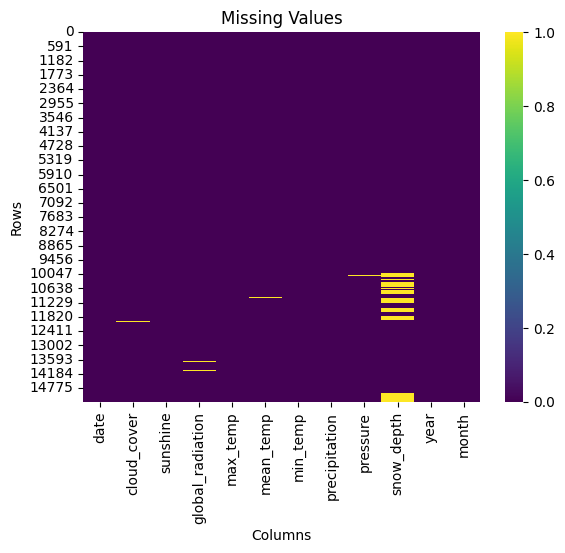

In [86]:
sns.heatmap(missing_values, cmap='viridis')
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

<AxesSubplot: >

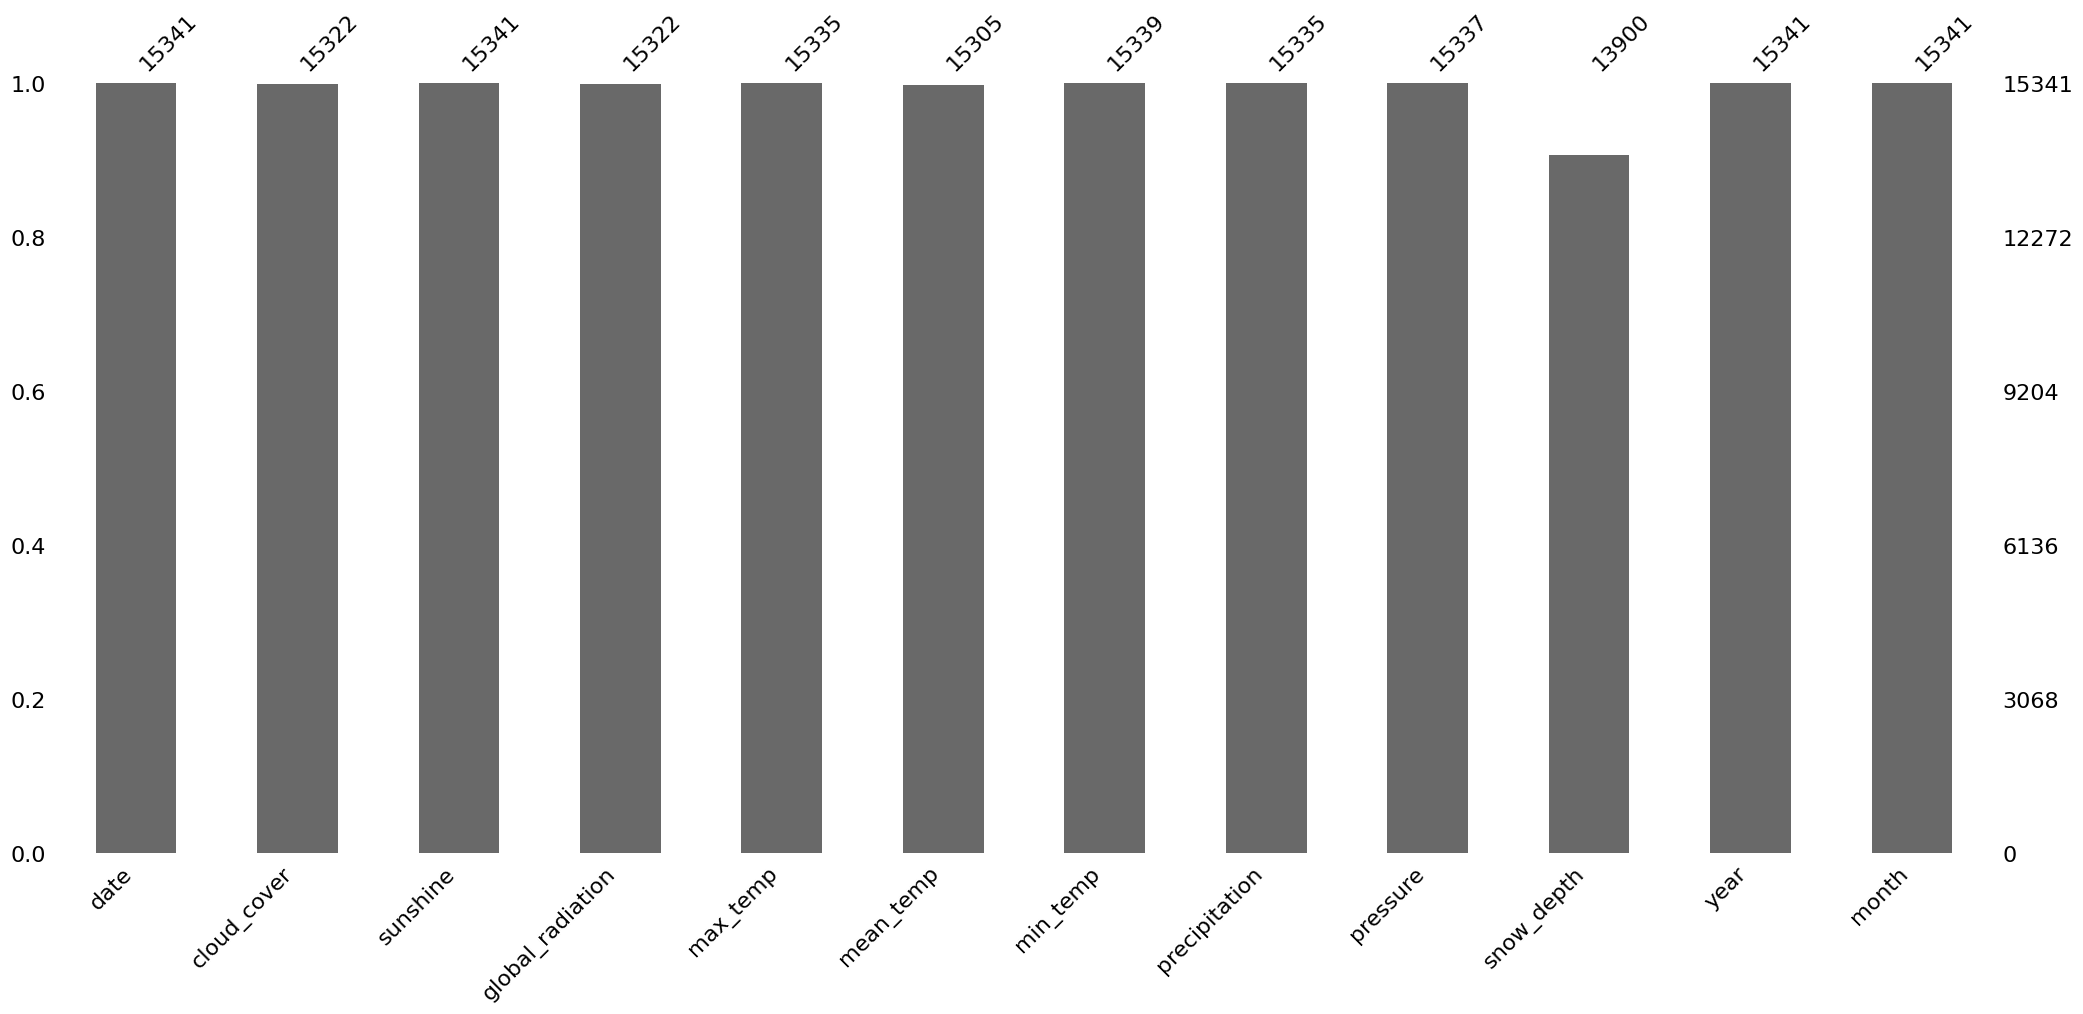

In [87]:
msno.bar(df)

<AxesSubplot: >

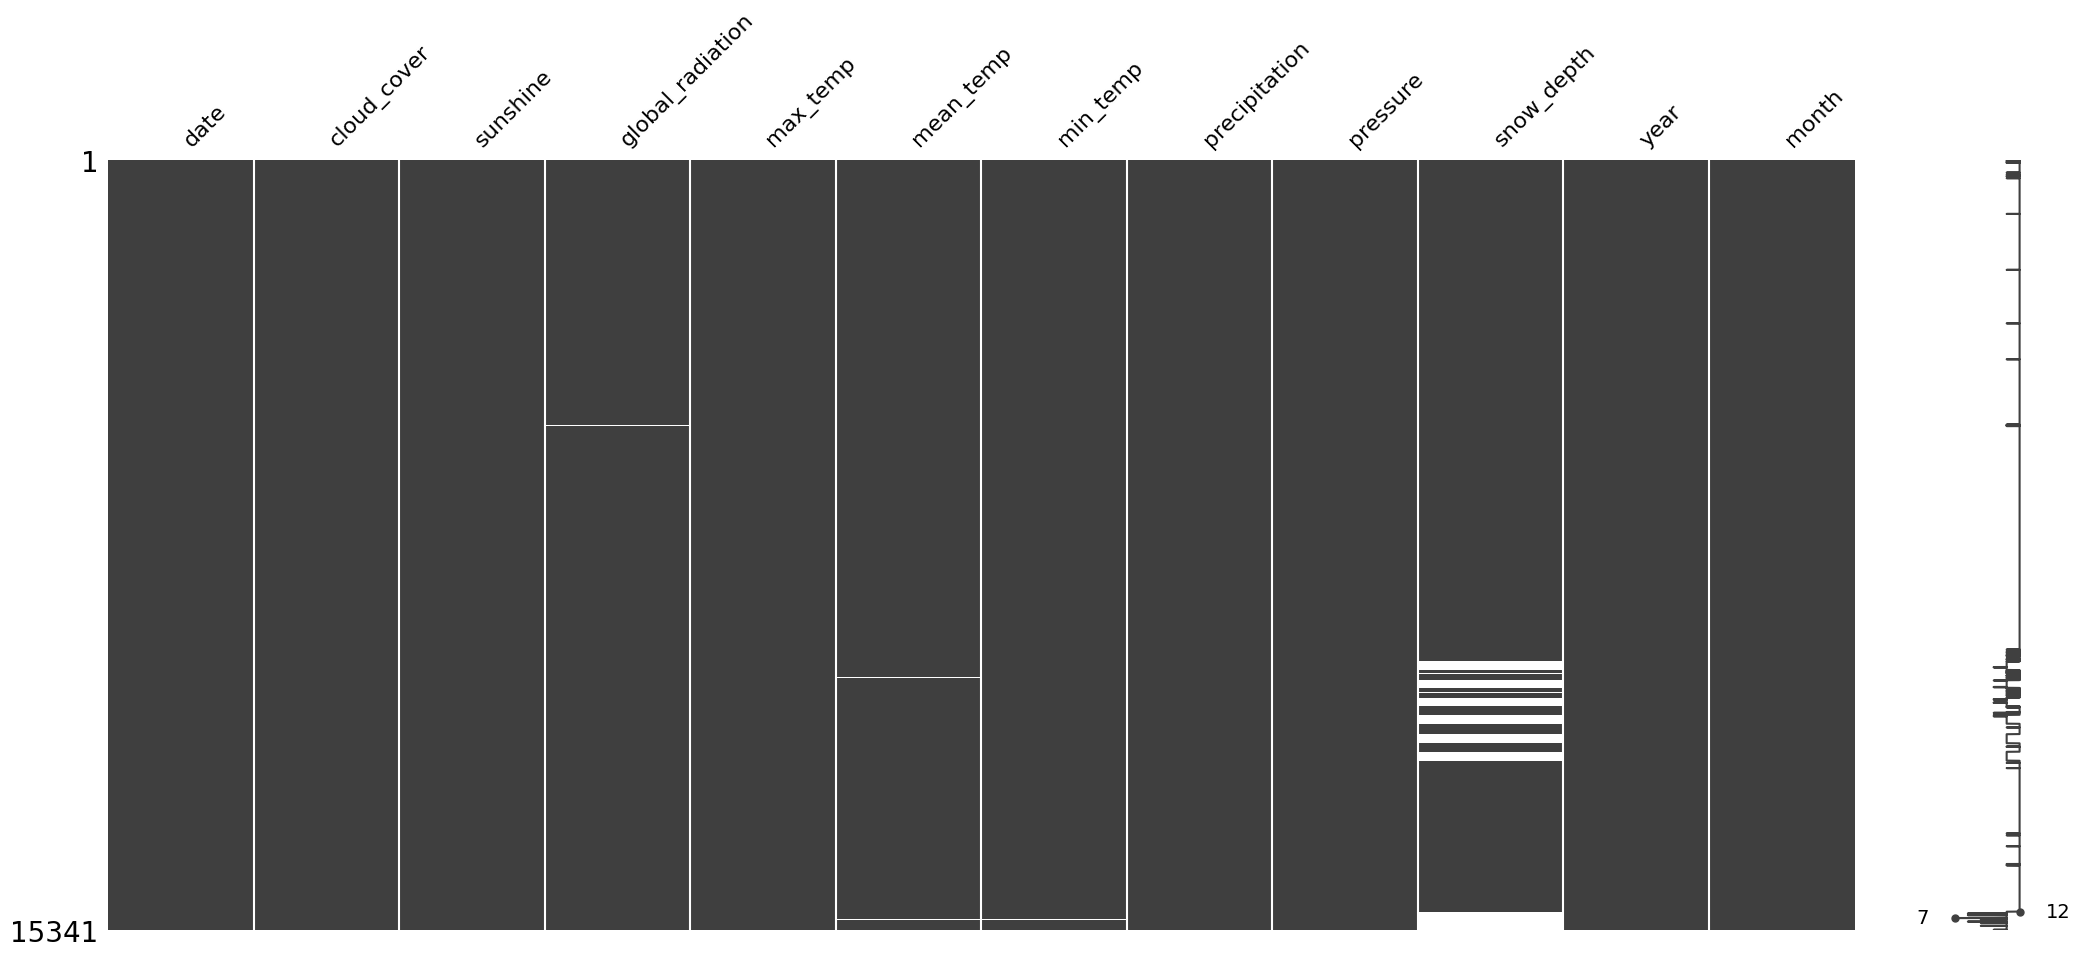

In [88]:
msno.matrix(df)

<AxesSubplot: >

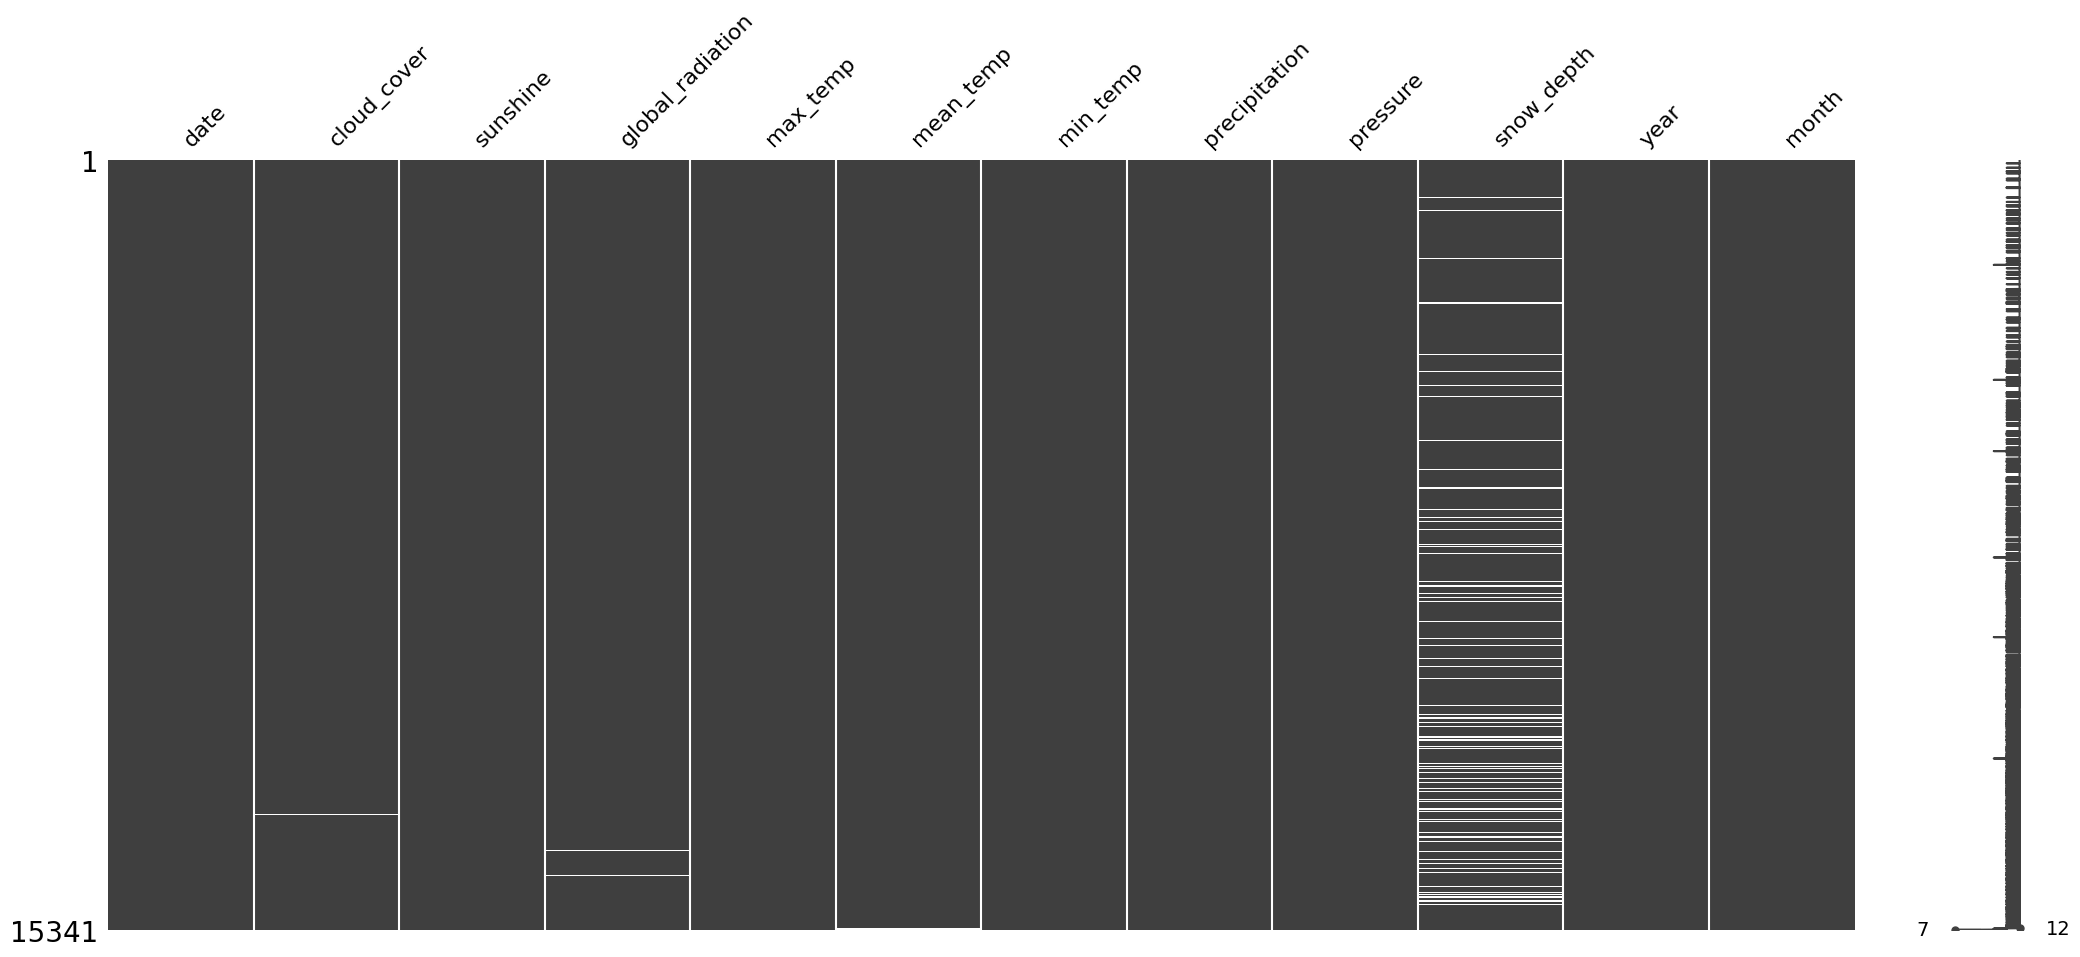

In [89]:
sorted = df.sort_values('mean_temp')
msno.matrix(sorted)

<AxesSubplot: >

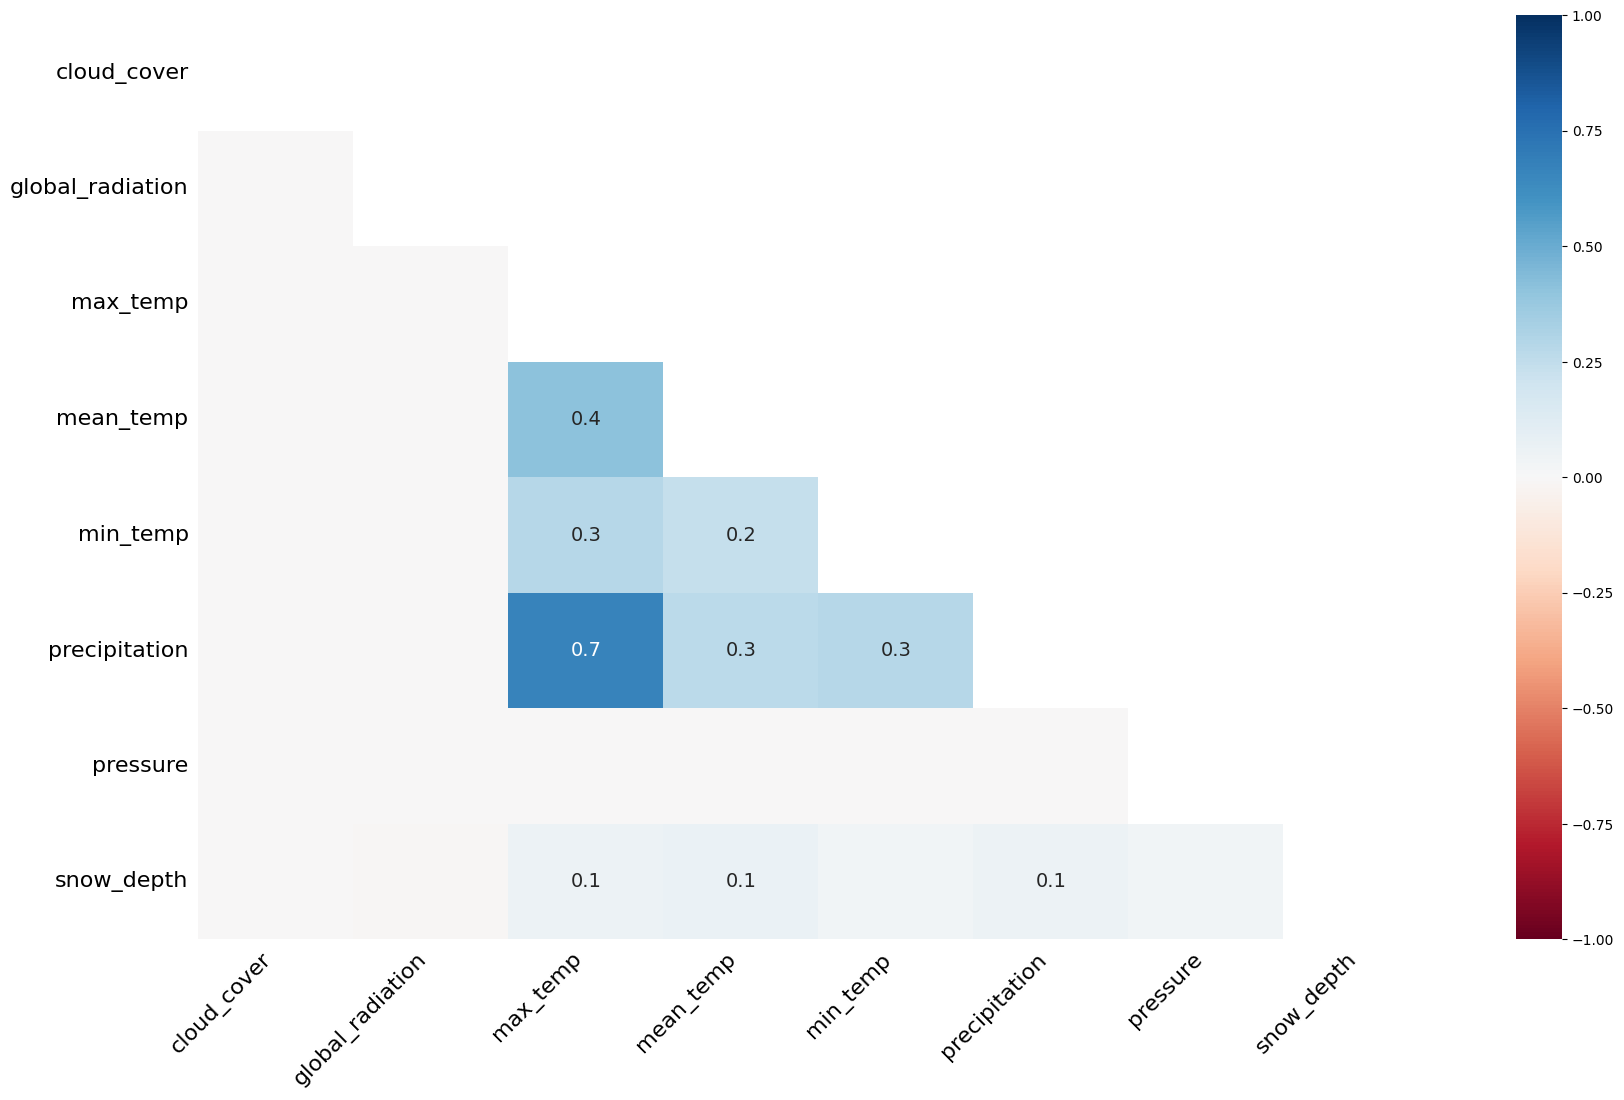

In [90]:
msno.heatmap(df)

<AxesSubplot: >

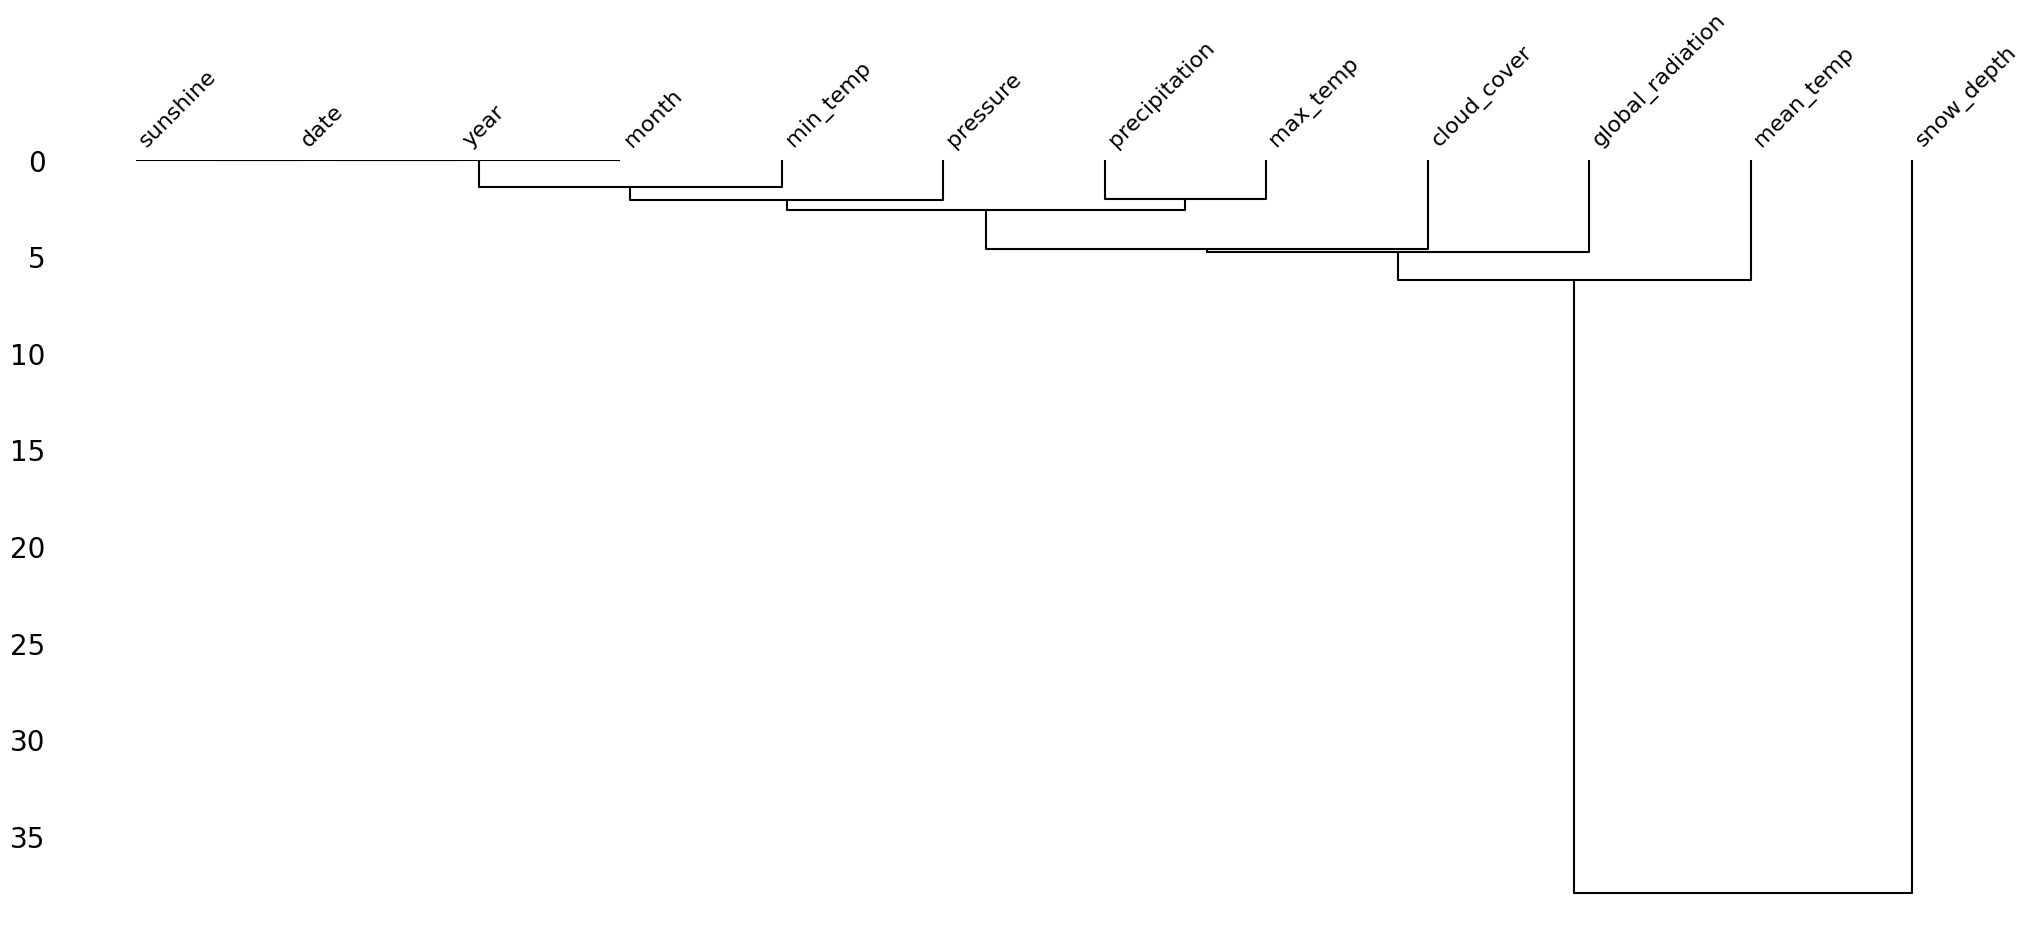

In [91]:
msno.dendrogram(df)

In [92]:
data = df.dropna(subset=['mean_temp'])

In [93]:
features = ['month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', 'global_radiation']
target = 'mean_temp'

In [94]:
X = data[features]    
y = data[target]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [96]:
imputer = SimpleImputer(strategy="mean")

In [97]:
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

In [98]:
scaler = StandardScaler()

In [99]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [100]:
for idx, depth in enumerate([1, 2, 5, 10, 20]): 
    run_name = f"run_{idx}"
    with mlflow.start_run(run_name=run_name):
        
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")
        
        y_pred_lin_reg = lin_reg.predict(X_test)
        lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
        y_pred_tree_reg = tree_reg.predict(X_test)
        tree_reg_rmse = mean_squared_error(y_test, y_pred_tree_reg, squared=False)
        y_pred_forest_reg = forest_reg.predict(X_test)
        forest_reg_rmse = mean_squared_error(y_test, y_pred_forest_reg, squared=False)
        
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)

        experiment_results = mlflow.search_runs()
        experiment_results
